In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("C:\WORK\Projects\Stroke predicition\healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.drop(columns=['id'],inplace=True) 

In [5]:
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isnull()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df=df.fillna(np.mean(df['bmi']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

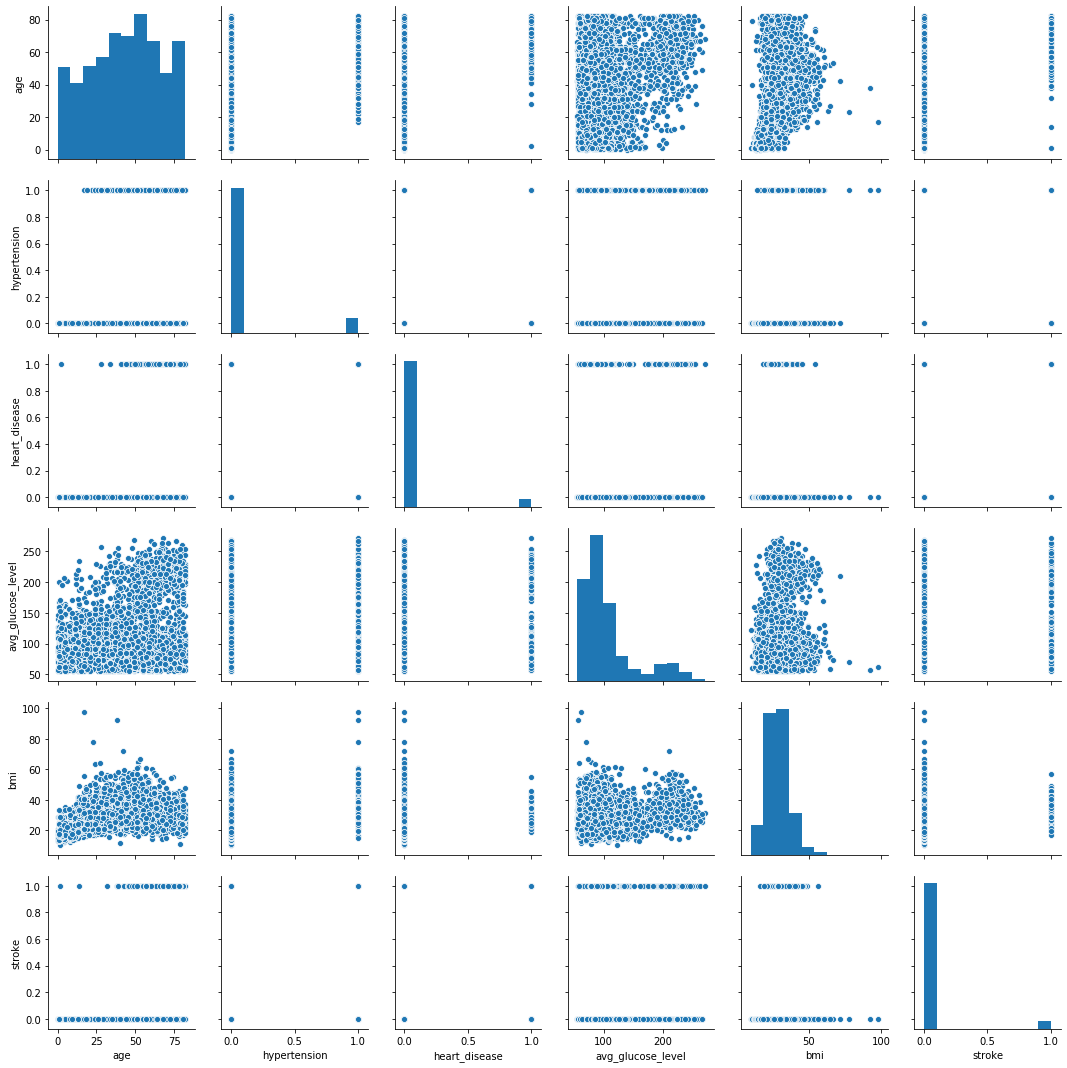

In [11]:
sns.pairplot(df)

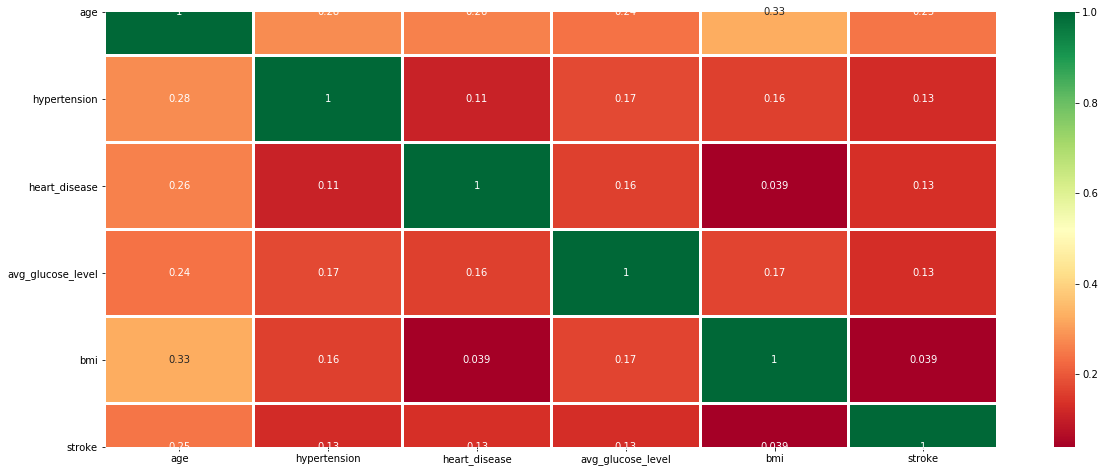

In [14]:
fig1=plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linecolor='white', linewidth=2 )

In [15]:
df['gender']=df['gender'].apply(lambda x : 1 if x=='Male' else 0) 
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [17]:
df=df[df['smoking_status']!='Unknown']

In [18]:
data_dummies = df[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies)
df.drop(columns=['smoking_status','work_type'],inplace=True)

C:\WORK\software\anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
data_dummies

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
5102,0,1,0,0,0,1,0,0
5105,0,1,0,0,0,1,0,0
5106,0,1,0,0,0,0,1,0
5107,0,1,0,0,0,0,1,0


In [20]:
y=df["stroke"]

In [21]:
df.drop(columns=['stroke'],inplace=True)
x=df.merge(data_dummies,left_index=True, right_index=True,how='left')

In [22]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,1,67.0,0,1,1,1,228.69,36.600000
1,0,61.0,0,0,1,0,202.21,28.893237
2,1,80.0,0,1,1,0,105.92,32.500000
3,0,49.0,0,0,1,1,171.23,34.400000
4,0,79.0,1,0,1,0,174.12,24.000000


In [23]:
x

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,0,77.93,21.700000,0,1,0,0,0,1,0,0
5105,0,80.0,1,0,1,1,83.75,28.893237,0,1,0,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,1,0


In [24]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5102    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, Length: 3566, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, shuffle=False, random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

C:\WORK\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
model.score(x_train,y_train)

0.9198717948717948

In [31]:
pred=model.predict(x_test)

In [32]:
sc=model.score(x_test,y_test)

In [33]:
sc

0.997196261682243

In [37]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))

Confusion Matrix: 
 [[1067    3]
 [   0    0]]


In [43]:
print(y_test)

3549    0
3550    0
3551    0
3553    0
3554    0
       ..
5102    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, Length: 1070, dtype: int64


In [44]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model1 .fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
model1.score(x_train,y_train)

0.921875

In [49]:
pred1=model1.predict(x_test)

In [51]:
sc1=model1.score(x_test,y_test)

In [52]:
sc1

0.9925233644859813

In [53]:
print("Confusion Matrix: \n", confusion_matrix(y_test, pred1))

Confusion Matrix: 
 [[1062    8]
 [   0    0]]


In [54]:
print(y_test)

3549    0
3550    0
3551    0
3553    0
3554    0
       ..
5102    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, Length: 1070, dtype: int64


In [56]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
model2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
model2.score(x_train,y_train)

1.0

In [58]:
pred2=model2.predict(x_test)

In [59]:
sc2=model2.score(x_test,y_test)

In [60]:
sc2

0.9925233644859813

In [61]:
print("Confusion Matrix: \n", confusion_matrix(y_test, pred2))

Confusion Matrix: 
 [[1062    8]
 [   0    0]]


In [62]:
from sklearn.svm import SVC
model3 = SVC(kernel = 'linear', random_state =0)
model3.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
model3.score(x_train,y_train)

0.9190705128205128

In [64]:
pred3=model3.predict(x_test)

In [65]:
sc3=model3.score(x_test,y_test)

In [66]:
sc3

1.0

In [67]:
print("Confusion Matrix: \n", confusion_matrix(y_test, pred3))

Confusion Matrix: 
 [[1070]]
